# ACF y PACF: El Diagnóstico Visual de la Estacionariedad y Dependencia 🧐

---

## **# 1. Función de Autocorrelación (ACF)**

La **Función de Autocorrelación (ACF)** mide la correlación entre una serie de tiempo ($Y_t$) y sus versiones rezagadas o desplazadas en el tiempo ($Y_{t-k}$).

En términos simples: **mide la relación de un valor actual con todos sus valores anteriores, incluyendo los efectos indirectos.**

### **A. La Definición**

El Coeficiente de Autocorrelación para un *rezago* o *lag* $k$ se calcula de manera similar al coeficiente de correlación de Pearson, pero comparando la serie consigo misma:

$$
\rho_k = \frac{\text{Cov}(Y_t, Y_{t-k})}{\text{Var}(Y_t)}
$$

Donde $\rho_k$ es el coeficiente de autocorrelación en el lag $k$.

### **B. Interpretación del Gráfico ACF**

El gráfico de ACF muestra los coeficientes de correlación ($\rho_k$) en el eje Y para cada *lag* ($k$) en el eje X.

| Característica Clave | Significado Estadístico | Conclusión |
| :--- | :--- | :--- |
| **Picos Significativos** | El valor actual se correlaciona con el valor de hace $k$ periodos. | Hay dependencia o memoria en la serie. |
| **Picos Fuertes y Lentos** | Los coeficientes caen muy lentamente a cero. | **La serie es NO Estacionaria** (generalmente debido a una Tendencia). |
| **Caída Rápida a Cero** | Los coeficientes caen rápidamente (después de 1 o 2 lags) dentro de la banda azul. | **La serie es Estacionaria** (Ruido Blanco o proceso AR/MA). |
| **Picos Estacionales** | Hay picos significativos que se repiten en múltiplos del periodo estacional (ej. en los lags 12, 24, 36). | Hay Estacionalidad. |



---

## **# 2. Función de Autocorrelación Parcial (PACF)**

La **Función de Autocorrelación Parcial (PACF)** mide la correlación entre una serie de tiempo ($Y_t$) y su versión rezagada ($Y_{t-k}$), **una vez que se ha eliminado la influencia (o el efecto indirecto) de todos los *lags* intermedios** ($Y_{t-1}, Y_{t-2}, \dots, Y_{t-k+1}$).

En términos simples: **mide la relación directa o pura entre el valor actual y el valor de hace $k$ periodos.**

### **A. El Propósito**

El PACF es esencial para diferenciar la dependencia **directa** de la dependencia **indirecta**.

* **Ejemplo:** En la ACF, $Y_t$ se correlaciona con $Y_{t-2}$ porque $Y_t$ depende de $Y_{t-1}$ y $Y_{t-1}$ depende de $Y_{t-2}$. El PACF elimina este efecto puente y solo mide si $Y_t$ depende *directamente* de $Y_{t-2}$.

### **B. Interpretación del Gráfico PACF**

| Característica Clave | Significado Estadístico | Implicación en el Modelo |
| :--- | :--- | :--- |
| **Pico Fuerte en Lag 1** | El valor actual depende fuertemente solo del valor inmediatamente anterior. | Indica un proceso **AR(1)** (Auto-Regresivo de orden 1). |
| **Caída Rápida a Cero** | Los coeficientes caen rápidamente a cero después de unos pocos lags. | Indica un proceso **MA(q)** (Media Móvil de orden q). |
| **Picos Estacionales** | Picos en múltiplos del periodo estacional (ej. 12, 24, 36), que indican una dependencia estacional *directa*. | Indica un proceso **SAR(P)** o **SMA(Q)**. |



---

## **# 3. ACF/PACF para Detectar la NO Estacionariedad (Tendencia)**

El uso más inmediato de ACF/PACF es el diagnóstico de **Estacionariedad**.

### **Regla de Oro para la Estacionariedad**

1.  **Serie NO Estacionaria (con Tendencia):**
    * El gráfico **ACF decae de forma lenta y gradual** a cero, sin importar cuántos lags veamos. Esto ocurre porque la tendencia arrastra la correlación a largo plazo.
    * El gráfico **PACF muestra un pico significativo en el Lag 1** y luego cae rápidamente a cero.

### **Ejemplo Práctico en Python (Serie NO Estacionaria)**

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_11780\2561908937.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range('2023-01-01', periods=100, freq='M')


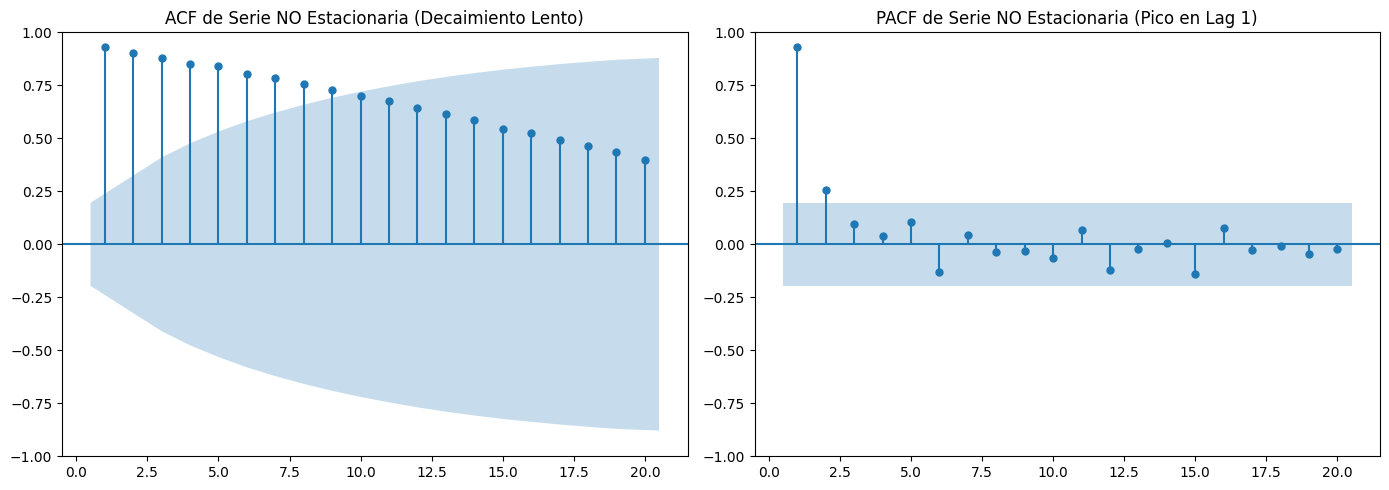

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- 1. Crear Serie NO Estacionaria (con Tendencia) ---
np.random.seed(42)
fechas = pd.date_range('2023-01-01', periods=100, freq='M')
# Serie con Tendencia (1.5*i) + Ruido
valores_no_estacionario = [10 + i * 1.5 + np.random.normal(0, 10) for i in range(len(fechas))]
serie_no_estacionaria = pd.Series(valores_no_estacionario, index=fechas)
# --------------------------------------------------------

# 2. Generar y Mostrar los Gráficos ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF
plot_acf(serie_no_estacionaria, lags=20, zero=False, ax=axes[0])
axes[0].set_title('ACF de Serie NO Estacionaria (Decaimiento Lento)')

# PACF
plot_pacf(serie_no_estacionaria, lags=20, zero=False, ax=axes[1])
axes[1].set_title('PACF de Serie NO Estacionaria (Pico en Lag 1)')

plt.tight_layout()
plt.show()

# CONCLUSIÓN ESPERADA: El ACF decae lentamente. Se requiere diferenciación.

### 4. ACF/PACF para Detectar la Estacionariedad (Ruido Blanco)
El caso más simple de una serie estacionaria es el Ruido Blanco (la meta de nuestros residuos).

**Regla de Oro para el Ruido Blanco (Estacionariedad):**

Tanto el gráfico ACF como el PACF deben mostrar cero correlación en todos los lags (todos los picos deben estar dentro de la banda azul de significancia). Esto significa que no hay memoria en la serie.

Ejemplo Práctico en Python (Serie Estacionaria - Ruido Blanco)

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_11780\4036709487.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas_est = pd.date_range('2023-01-01', periods=100, freq='M')


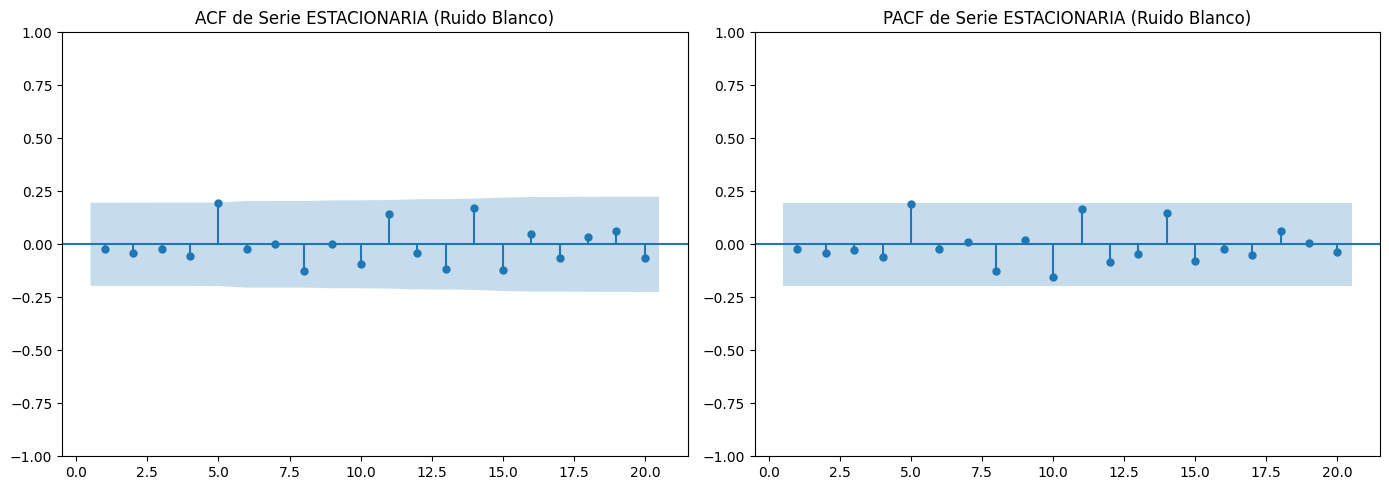

In [3]:
# --- 1. Crear Serie Estacionaria (Puro Ruido Blanco) ---
# Creamos una serie puramente aleatoria (Ruido Blanco), que es estacionaria por definición
np.random.seed(42)
fechas_est = pd.date_range('2023-01-01', periods=100, freq='M')
serie_estacionaria = pd.Series(np.random.normal(0, 10, 100), index=fechas_est)
# --------------------------------------------------------

# 2. Generar y Mostrar los Gráficos ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF
plot_acf(serie_estacionaria, lags=20, zero=False, ax=axes[0])
axes[0].set_title('ACF de Serie ESTACIONARIA (Ruido Blanco)')

# PACF
plot_pacf(serie_estacionaria, lags=20, zero=False, ax=axes[1])
axes[1].set_title('PACF de Serie ESTACIONARIA (Ruido Blanco)')

plt.tight_layout()
plt.show()

# CONCLUSIÓN ESPERADA: Casi todos los picos caen dentro de la banda azul.
# Esto indica que la serie es Ruido Blanco, lo que confirma la Estacionariedad.